# Computer Lab Exercises week 5 (SOLUTIONS)

* These lab exercises are designed to introduce making jupyter notebooks interactive and using python to create GUIs
* These exercises are **not** part of the assessment of the Module.
* I will post the solutions roughly 1 week after this file has been uploaded to the DLE.
* Please first watch and work through the linkedin learning video https://www.linkedin.com/learning-login/share?account=26140778&forceAccount=false&redirect=https%3A%2F%2Fwww.linkedin.com%2Flearning%2Fpython-gui-development-with-tkinter-2%3Ftrk%3Dshare_ent_url%26shareId%3DuhoH31WaTfWizUsBHk0RcA%253D%253D

* See https://sites.google.com/view/pythonforstemstudents/home for a collection
of links to information on python.

* See the very complete documentation on tkinter at https://tkdocs.com/tutorial/index.html


## Question 1



##  Question 1a)  Working with Tkinter


* Modify the script below so that there is an additional column (so the GUI looks like the picture below).


![GeomManager](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/geom_manage.png?raw=true)

In [1]:
import tkinter as tk
master = tk.Tk()
tk.Label(master, 
         text="Left top").grid(row=0, column=0)
tk.Label(master, 
         text="Left bottom").grid(row=1,column=0)
tk.mainloop()


In [2]:
# Solution
##
##  https://www.python-course.eu/tkinter_entry_widgets.php
##
import tkinter as tk
master = tk.Tk()
tk.Label(master, 
         text="Left top").grid(row=0, column=0)
tk.Label(master, 
         text="Left bottom").grid(row=1,column=0)
tk.Label(master, 
         text="Right top").grid(row=0, column=1)
tk.Label(master, 
         text="Right bottom").grid(row=1,column=1)
tk.mainloop()


##  Questions about pywidgets
*  See the documentation https://ipywidgets.readthedocs.io/en/7.6.2/index.html

##  Question 2a

* Modify the code below so the square of the number is calculated
* The documentation for interact is at: https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

In [3]:
from ipywidgets import interact
def f(x):
    return x

In [4]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [5]:
# Solution
def f(x):
    return x**2

In [7]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

### Some comments
In the lab a couple of people asked about how to get the value back from the function. I don't see an obvious way to do this using interact.

* One way is to add a global variable to communicate the value back to the notebook

In [8]:
xglobal = 10
def f(x):
    global xglobal
    xglobal = x**2
    return xglobal


In [10]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [11]:
print("The value selected is ", xglobal)

The value selected is  100


A better solution is to use the interactive widget

In [12]:
from ipywidgets import interactive
w = interactive(f, x=10)

In [14]:
display(w)

interactive(children=(IntSlider(value=3, description='x', max=30, min=-10), Output()), _dom_classes=('widget-i…

In [15]:
w.kwargs

{'x': 3}

In [16]:
w.kwargs['x']

3

##  Question 2b 
* The code below creates blue and red buttons
* Modify the code to add green and black to the option

In [22]:
import ipywidgets as widgets

color_buttons = widgets.ToggleButtons(
    options=['blue', 'red'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red'), value='blue')

In [23]:
print("color = " , color_buttons.value )

color =  red


In [25]:
# The solution is here
import ipywidgets as widgets

color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green', 'black'],
    description='Color:',
)
color_buttons
#print("color = " , color_buttons.value )

ToggleButtons(description='Color:', options=('blue', 'red', 'green', 'black'), value='blue')

##  Question 2c
* The code below plots a histogram of some random data
* The colour of the data is black. Modify the code so that color can selected interactivly using pywidgets

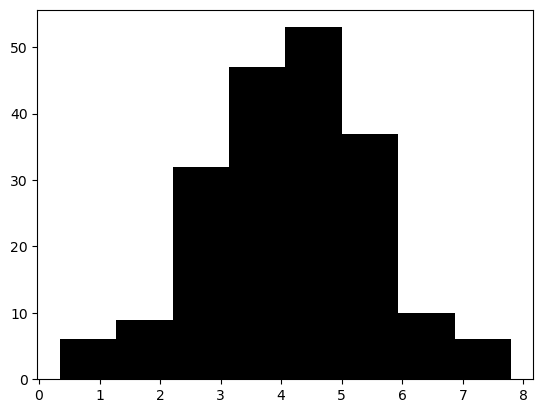

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

plt.hist(x, bins=8, linewidth=0.5, color="black")
plt.show()

In [27]:
#  Solution
# This cell must be run before the next cell
# This was my first solution
import ipywidgets as widgets

color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green', 'black'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green', 'black'), value='blue')

color =  blue


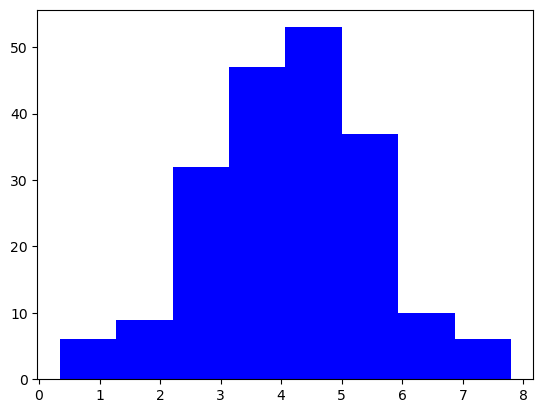

In [18]:
print("color = " , color_buttons.value )

import matplotlib.pyplot as plt
import numpy as np

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

plt.hist(x, bins=8, linewidth=0.5, color=color_buttons.value)
plt.show()

A better solution is to use the interact widgets https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html  

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

def plot_hist(color) :
    # make data
    np.random.seed(1)
    x = 4 + np.random.normal(0, 1.5, 200)

    plt.hist(x, bins=8, linewidth=0.5, color=color)
    plt.show()

    
#plot_hist("red")

widgets.interact(plot_hist, color=['blue', 'red', 'green', 'black'] );

interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', 'black'), value='blue'), …

##  Question 2d
* The aim of this question is to create an interactive plot
* The questions uses the interact function in pywidgets  https://ipywidgets.readthedocs.io/en/7.6.2/examples/Using%20Interact.html

In [29]:
#  create some random points to plot
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt
x = np.random.uniform(0, 5, size=100)
ep = np.random.normal(size=100)

y = 2*x + ep + 1
x_values = np.linspace(0, 5, 1000)

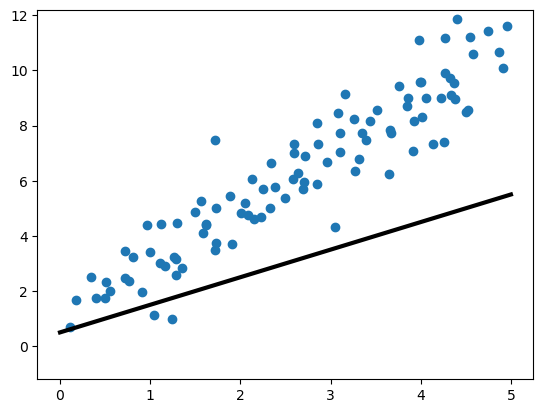

In [30]:


def slope_viz(m=1):
    """
    Plot the random data
    Plot a straight line y = a = mx
    for the intercept a and slope m
    """
    a = 0.5
    plt.scatter(x, y)
    x0 = 0
    x1 = 5
    y0 = a
    y1 = a + m*x1
    
    plt.plot([x0,x1], [y0,y1], lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);# Solution

slope_viz(m=1)

The plot can be made interactive using pywidgets

In [31]:
widgets.interact(slope_viz, m=(0.2, 5, 0.2));

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), Output()), _dom_cla…

Modify the code so that the intercept parameter a can be varied.  The final plot should look like the plot below


![2lide](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/2slider.png?raw=true)

In [32]:
# Solution

def slope_viz(m=1,a=0):
    """
    Plot the random data
    Plot a straigt line y = a = mx
    for the intercept a and slope m
    """
    plt.scatter(x, y)
    x0 = 0
    x1 = 5
    y0 = a
    y1 = a + m*x1
    
    plt.plot([x0,x1], [y0,y1], lw=3, color='black')
    
    plt.ylim(-1.2, 12.2);

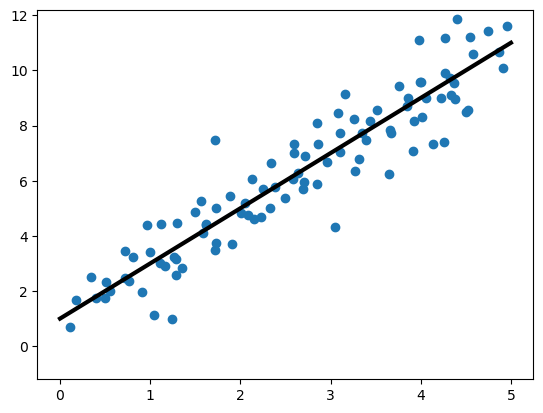

In [33]:
slope_viz(2,1)

In [34]:
widgets.interact(slope_viz, m=(0.2, 5, 0.2), a = (-1,1, 0.2));

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), FloatSlider(value=0…

##  Question 3   Using  a GUI to create a plot


The aim of question is to create a python script with
a radio button. When the radio button is pressed, a bar plot is plotted. See figure

![GUIbarplot](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/gui_barplot.png?raw=true)


* The idea is too combine the plotting code and GUI Checkbutton code below

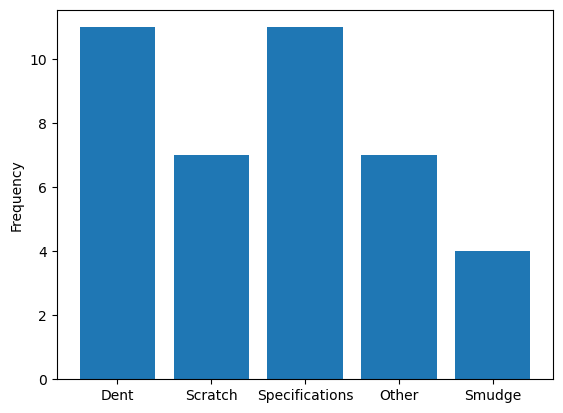

In [35]:
# plotting script
import matplotlib.pyplot as plt
x_pos  = [ 0 , 1 , 2 , 3 , 4] 
bars   = [ "Dent" , "Scratch" , "Specifications" , "Other"  , "Smudge" ] 
frequency = [ 11, 7 , 11 , 7 , 4 ] 
plt.bar(x_pos, frequency)
plt.xticks(x_pos, bars)
plt.ylabel('Frequency')

plt.show()

In [36]:
# GUI Checkbutton

# Modify this script to solve the problem

import matplotlib
matplotlib.use("TkAgg")
from matplotlib import pyplot as plt

import tkinter as tk
from _cffi_backend import callback
 
def callBackFunc():
     print("Oh. I'm clicked" , chkValue.get())
   
root = tk.Tk() 
root.geometry('250x200')

chkValue = tk.BooleanVar() 
chkValue.set(False)
 
chkExample = tk.Checkbutton(root, text='Barplot', 
                            var=chkValue, command=callBackFunc) 
chkExample.grid(column=0, row=0)

root.mainloop()


Oh. I'm clicked True


In [37]:
# Solution

In [39]:

import matplotlib.pyplot as plt
x_pos  = [ 0 , 1 , 2 , 3 , 4] 
bars   = [ "Dent" , "Scratch" , "Specifications" , "Other"  , "Smudge" ] 
frequency = [ 11, 7 , 11 , 7 , 4 ]


import matplotlib
matplotlib.use("TkAgg")
from matplotlib import pyplot as plt

import tkinter as tk
from _cffi_backend import callback
 
def callBackFunc():
    plt.bar(x_pos, frequency)
    plt.xticks(x_pos, bars)
    plt.ylabel('Frequency')

plt.show()
   
root = tk.Tk() 
root.geometry('250x200')

chkValue = tk.BooleanVar() 
chkValue.set(False)
 
chkExample = tk.Checkbutton(root, text='Barplot', 
                            var=chkValue, command=callBackFunc) 
chkExample.grid(column=0, row=0)

root.mainloop()


##  Question 4  (Advanced) creating an interactive plot

This is an example of creating an interactive plot


We will load in a data set about penguins from

* https://github.com/allisonhorst/palmerpenguins/blob/main/README.md
* https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download

and create an interactive graph



In [1]:
import pandas as pd
import ipywidgets as widgets
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv('penguins_size.csv')

**SOLUTION**

* The sex is added as an argument to the function.
* sex_widget widget is created

In [3]:
def eda_widget(sex, island, species):
    # Filter the dataset based on the selected widget values
    df = penguins[(penguins['sex'] == sex) & (penguins['island'] == island) & (penguins['species'] == species)]

    # Compute some summary statistics
    num_rows = len(df)
    mean_body_mass = df['body_mass_g'].mean()
    median_body_mass = df['body_mass_g'].median()

    # Create some plots
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    sns.histplot(data=df, x='culmen_length_mm', hue='sex', ax=axs[0])
    axs[0].set_title('Distribution of culmen length by sex')
    sns.scatterplot(data=df, x='culmen_depth_mm', y='body_mass_g', hue='species', ax=axs[1])
    axs[1].set_title('Scatter plot of culmen depth vs. body mass by species')
    plt.show()

    # Display the summary statistics
    print(f"Number of penguins: {num_rows}")
    print(f"Mean body mass: {mean_body_mass:.2f} g")
    print(f"Median body mass: {median_body_mass:.2f} g")

In [4]:
sex_widget = widgets.Dropdown(options=['MALE', 'FEMALE'], description='Sex:')
island_widget = widgets.Dropdown(options=['Biscoe', 'Dream', 'Torgersen'], description='Island:')
species_widget = widgets.Dropdown(options=['Adelie', 'Chinstrap', 'Gentoo'], description='Species:')

In [5]:
widgets.interact(eda_widget, sex=sex_widget, island=island_widget, species=species_widget);

interactive(children=(Dropdown(description='Sex:', options=('MALE', 'FEMALE'), value='MALE'), Dropdown(descrip…